In [ ]:
import pandas as pd

# 用 train_set 来学习规律
train = pd.read_csv('data/train_set.csv', sep='\t', nrows=50000) 

print("真题读取成功，开始学习！")

真题读取成功，开始学习！


In [14]:
import pandas as pd

# 1. 读取训练集
# 注意：sep='\t' 非常重要，因为数据是用 Tab 键隔开的
train = pd.read_csv('data/train_set.csv', sep='\t')

# 2. 打印前 5 行，确认读取成功
print("数据前 5 行：")
display(train.head()) # 在 Notebook 里用 display 比 print 好看

# 3. 看看数据集的大小
print(f"训练集一共有 {len(train)} 条新闻。")

数据前 5 行：


,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


训练集一共有 200000 条新闻。


In [15]:
train['label'].value_counts()

label
0     38918
1     36945
2     31425
3     22133
4     15016
5     12232
6      9985
7      8841
8      7847
9      5878
10     4920
11     3131
12     1821
13      908
Name: count, dtype: int64

In [ ]:
# 词数
train['text_len'] = train['text'].apply(lambda x: len(x.split()))
print(train['text_len'].describe())

count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


In [ ]:
# 字符总数，包括空格，没有用
train['text_len'] = train['text'].apply(lambda x: len(x))
print(train['text_len'].describe())

count    200000.000000
mean       4396.936725
std        4840.303668
min           9.000000
25%        1817.000000
50%        3275.000000
75%        5478.000000
max      283530.000000
Name: text_len, dtype: float64


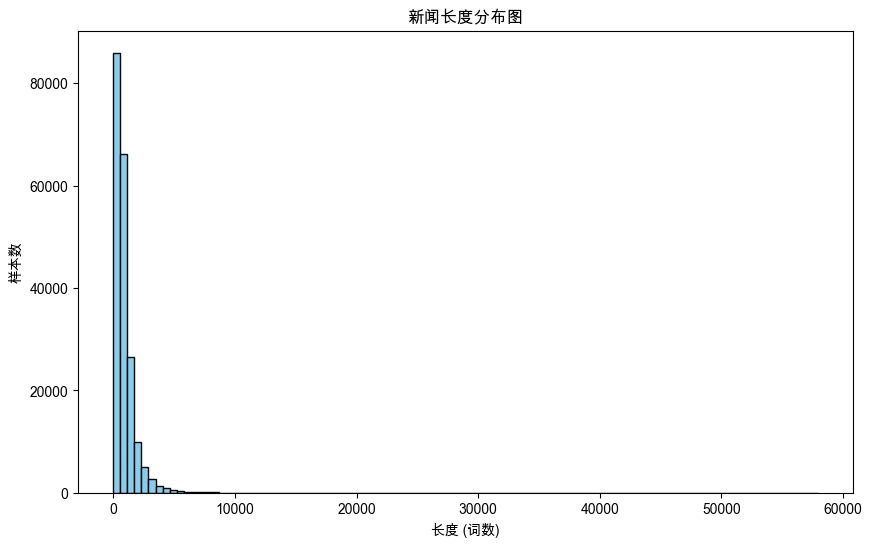

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
# -----------------------

plt.figure(figsize=(10, 6))
plt.hist(train['text_len'], bins=100, color='skyblue', edgecolor='black')

plt.title("新闻长度分布图")
plt.xlabel("长度 (词数)")
plt.ylabel("样本数")
plt.show()

In [18]:
# 1. 查看前几行，确认数据对齐
print(train.head())

# 2. 查看数据整体信息：总行数、列名、有没有空值
print("\n--- 数据体检报告 ---")
train.info()

   label                                               text  text_len
0      2  2967 6758 339 2021 1854 3731 4109 3792 4149 15...      1057
1     11  4464 486 6352 5619 2465 4802 1452 3137 5778 54...       486
2      3  7346 4068 5074 3747 5681 6093 1777 2226 7354 6...       764
3      2  7159 948 4866 2109 5520 2490 211 3956 5520 549...      1570
4      3  3646 3055 3055 2490 4659 6065 3370 5814 2465 5...       307

--- 数据体检报告 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   label     200000 non-null  int64 
 1   text      200000 non-null  object
 2   text_len  200000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


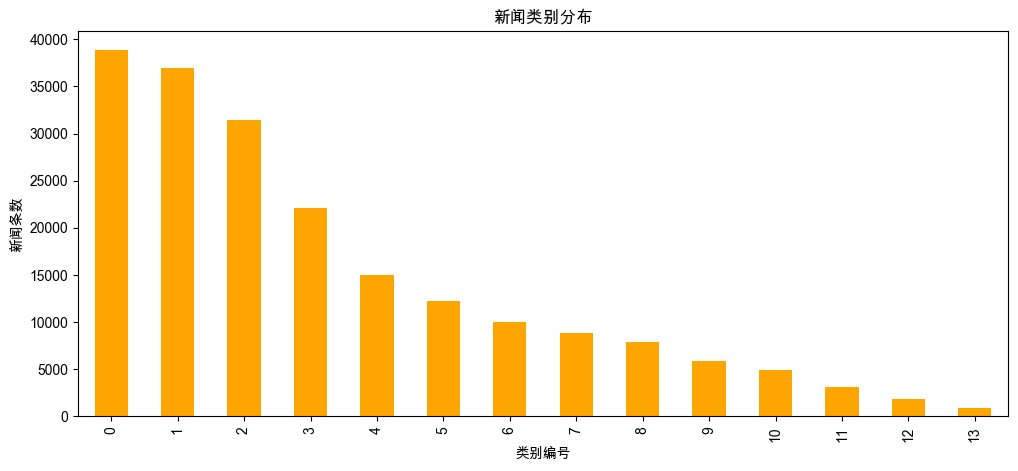

label
0     0.194590
1     0.184725
2     0.157125
3     0.110665
4     0.075080
5     0.061160
6     0.049925
7     0.044205
8     0.039235
9     0.029390
10    0.024600
11    0.015655
12    0.009105
13    0.004540
Name: proportion, dtype: float64


In [19]:
import matplotlib.pyplot as plt

# 设置 Mac 中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 

# 统计每个类别的数量并画图
plt.figure(figsize=(12, 5))
train['label'].value_counts().plot(kind='bar', color='orange')
plt.title('新闻类别分布')
plt.xlabel('类别编号')
plt.ylabel('新闻条数')
plt.show()

# 看看具体的百分比
print(train['label'].value_counts(normalize=True))


--- 句子长度统计 ---
count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


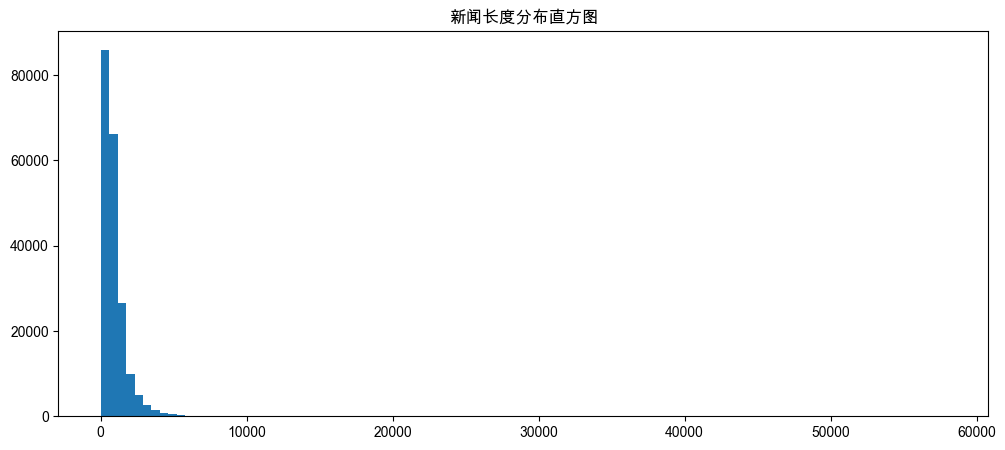

In [20]:
# 计算每行 text 的词数（按空格切分）
train['text_len'] = train['text'].apply(lambda x: len(x.split()))

print("\n--- 句子长度统计 ---")
print(train['text_len'].describe())

# 画个分布图
plt.figure(figsize=(12, 5))
plt.hist(train['text_len'], bins=100)
plt.title('新闻长度分布直方图')
plt.show()

In [21]:
from collections import Counter

# 把所有新闻的数字全部打散，装进一个大列表里
all_lines = ' '.join(list(train['text']))
all_words = all_lines.split()

# 统计每个数字出现的次数
word_count = Counter(all_words)
# 找出最常出现的 20 个数字
common_words = word_count.most_common(20)

print("\n--- 出现频率最高的 20 个数字 ---")
for word, freq in common_words:
    print(f"数字 {word} 出现了 {freq} 次")


--- 出现频率最高的 20 个数字 ---
数字 3750 出现了 7482224 次
数字 648 出现了 4924890 次
数字 900 出现了 3262544 次
数字 3370 出现了 2020958 次
数字 6122 出现了 1602363 次
数字 4464 出现了 1544962 次
数字 7399 出现了 1455864 次
数字 4939 出现了 1387951 次
数字 3659 出现了 1251253 次
数字 4811 出现了 1159401 次
数字 5598 出现了 1121908 次
数字 2465 出现了 1087011 次
数字 669 出现了 1086645 次
数字 2400 出现了 1031116 次
数字 5560 出现了 1020573 次
数字 299 出现了 927955 次
数字 2109 出现了 921676 次
数字 4893 出现了 917183 次
数字 4411 出现了 884362 次
数字 1699 出现了 853028 次


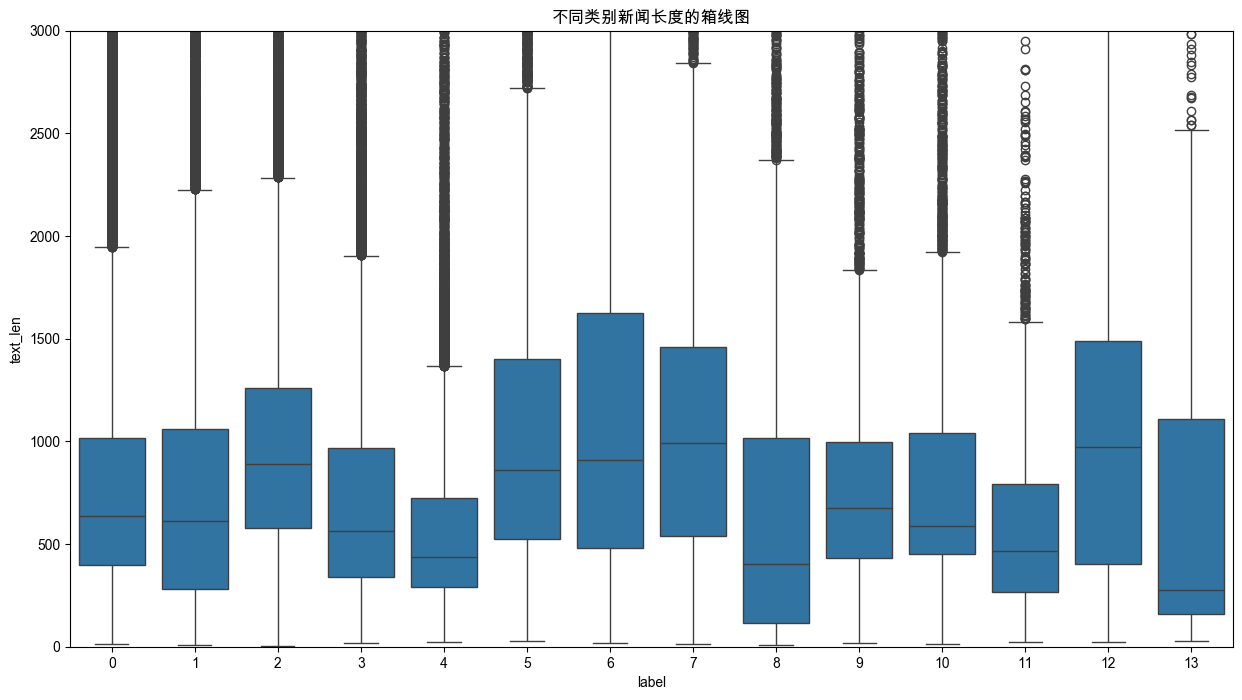

In [22]:
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(x='label', y='text_len', data=train)
plt.title('不同类别新闻长度的箱线图')
plt.ylim(0, 3000) # 限制高度方便观察
plt.show()

In [25]:
# 假设字符3750，字符900和字符648是句子的标点符号，判断每篇新闻平均由多少个句子构成
import pandas as pd

def sen_count(text):
    words = text.split()
    count = words.count('3750') + words.count('900') + words.count('648')

    if words[-1] not in['3750', '900', '648']:
        count += 1
    return count


train['sen_count'] = train['text'].apply(sen_count)

avg_sen_count = train['sen_count'].mean()
print(f'每篇新闻平均由{avg_sen_count:.2f}个句子构成')

每篇新闻平均由78.92个句子构成


In [28]:
# 统计每类新闻中出现次数对多的字符

from collections import Counter

def most_common(text):
    all_text = ''.join(text)
    words = all_text.split()
    sum_word = Counter(words)
    return sum_word.most_common(1)[0]


result = train.groupby("label")['text'].apply(most_common)

print('每类新闻中出现次数最多的字符（字符，词数）：')
print(result)

每类新闻中出现次数最多的字符（字符，词数）：
label
0     (3750, 1267328)
1     (3750, 1200679)
2     (3750, 1458330)
3      (3750, 774666)
4      (3750, 360839)
5      (3750, 715740)
6      (3750, 469539)
7      (3750, 428638)
8      (3750, 242367)
9      (3750, 178780)
10     (3750, 180259)
11      (3750, 83834)
12      (3750, 87412)
13      (3750, 33796)
Name: text, dtype: object


In [1]:
# Task3 
# TF-IDF + RidgeClassifier

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score

train_df = pd.read_csv('./data/train_set.csv', sep='\t', nrows=50000)

tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=5000)
train_test = tfidf.fit_transform(train_df['text'])

clf = RidgeClassifier()
clf.fit(train_test[:40000], train_df['label'].values[:40000])

val_pred = clf.predict(train_test[40000:])
print(f1_score(train_df['label'].values[40000:], val_pred, average='macro'))


0.9039927784596091


### 实验结果分析：为什么我的模型分数（0.904）比教程（0.87）更高？

通过对比 Datawhale 官方示例与我自己的实验设置，我认为分数提升主要源于以下三个核心因素：

#### 1. 训练数据量的显著增加 (Data Volume)
*   **官方设置**：使用了 10,000 条数据进行训练。
*   **我的设置**：使用了 40,000 条数据进行训练。
*   **原因分析**：在机器学习中，“数据决定上限”。更多的训练样本意味着模型见过了更多样化的新闻表述、更多的匿名数字组合和更丰富的语境。这大大增强了模型的泛化能力，使其在面对未见的验证集时能够做出更准确的判断。

#### 2. 特征维度的扩大 (Feature Capacity)
*   **官方设置**：`max_features=3000`。
*   **我的设置**：`max_features=5000`。
*   **原因分析**：`max_features` 决定了 TF-IDF 矩阵的宽度。
    *   增加到 5000 意味着模型可以“记住”并利用更多出现频率较高且具有区分度的字符或词组（N-grams）。
    *   一些在 3000 名之外但在 5000 名之内的关键词（数字）被纳入了计算，提供了额外的分类线索。

#### 3. 验证集的代表性与稳定性
*   **官方设置**：验证集 5,000 条。
*   **我的设置**：验证集 10,000 条。
*   **原因分析**：更大的验证集意味着评估结果更具说服力，受个别“脏数据”或极端样本的影响更小。

#### 4. 实验对比总结表

| 维度 | Datawhale 示例 | 我的实验 | 影响 |
| :--- | :--- | :--- | :--- |
| 训练样本数 | 10,000 | 40,000 | **正向**：模型学习更充分 |
| 特征数 (max_features) | 3,000 | 5,000 | **正向**：提取信息更丰富 |
| 验证样本数 | 5,000 | 10,000 | **正向**：评估结果更稳健 |
| **F1 Score** | **~0.87** | **~0.904** | **提升显著** |

#### 结论
本次实验验证了在机器学习任务中，**“增加高质量训练数据”**和**“适度扩大特征规模”**是提升模型性能最直接且有效的手段。这也体现了 R&D 工作中“数据驱动”的核心思想。

In [10]:
# 优化-逻辑回归-Logistic Rgression 模型

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(C = 1.0, solver = 'lbfgs', max_iter = 500)

clf_lr.fit(train_test[:40000], train_df['label'].values[:40000])

val_pred_lr = clf_lr.predict(train_test[40000:])


print(f"Logistic Regression F1 Score: {f1_score(train_df['label'].values[40000:], val_pred_lr, average = 'macro')}")





Logistic Regression F1 Score: 0.9038702183490676


In [1]:
# FastText

import pandas as pd
from sklearn.metrics import f1_score

train_df = pd.read_csv('data/train_set.csv', sep='\t', nrows = 15000)
train_df['label_ft'] = '__label__' + train_df['label'].astype(str)
train_df[['text', 'label_ft']].iloc[:-5000].to_csv('train.csv', index = None, header = None, sep = '\t')

import fasttext
model = fasttext.train_supervised('train.csv', lr = 1.0, wordNgrams = 2, verbose = 2, minCount = 1, epoch = 25, loss = 'hs')

val_pred = [model.predict(x)[0][0].split('__')[-1] for x in train_df.iloc[-5000:]['text']]

# 真实答案转换成字符串类型以匹配预测结果，计算F1分数
print(f1_score(train_df['label'].values[-5000:].astype(str), val_pred, average = 'macro'))

Read 9M words
Number of words:  5341
Number of labels: 14
Progress: 100.0% words/sec/thread: 4478612 lr:  0.000000 avg.loss:  0.145941 ETA:   0h 0m 0s


0.8217421493941703


In [ ]:
# FastText

import pandas as pd
from sklearn.metrics import f1_score

train_df = pd.read_csv('data/train_set.csv', sep='\t', nrows = 5000)
train_df['label_ft'] = '__label__' + train_df['label'].astype(str)
train_df[['text', 'label_ft']].iloc[:-5000].to_csv('train.csv', index = None, header = None, sep = '\t')

import fasttext
model = fasttext.train_supervised('train.csv', lr = 1.0, wordNgrams = 2, verbose = 2, minCount = 1, epoch = 50, loss = 'hs')

val_pred = [model.predict(x)[0][0].split('__')[-1] for x in train_df.iloc[-5000:]['text']]

# 真实答案转换成字符串类型以匹配预测结果，计算F1分数
print(f1_score(train_df['label'].values[-5000:].astype(str), val_pred, average = 'macro'))

Read 9M words
Number of words:  5341
Number of labels: 14
Progress: 100.0% words/sec/thread: 4099912 lr:  0.000000 avg.loss:  0.074614 ETA:   0h 0m 0s


0.8225999668500608


In [12]:
import pandas as pd

# 1. 重新读取数据（建议设为 50000 条，M3 跑起来很轻松）
train_df = pd.read_csv('data/train_set.csv', sep='\t', nrows=50000)

# 2. 准备 FastText 格式
train_df['label_ft'] = '__label__' + train_df['label'].astype(str)
ft_data = train_df['label_ft'] + ' ' + train_df['text']

# 3. 【关键改动】动态计算切分点
split_idx = int(len(ft_data) * 0.8) # 自动计算 80% 的位置

# 4. 保存文件
ft_data.iloc[:split_idx].to_csv('train_ft.txt', index=False, header=False)
ft_data.iloc[split_idx:].to_csv('val_ft.txt', index=False, header=False)

print(f"✅ 数据处理完成！")
print(f"训练集大小: {len(ft_data.iloc[:split_idx])} 条")
print(f"验证集大小: {len(ft_data.iloc[split_idx:])} 条")

✅ 数据处理完成！
训练集大小: 40000 条
验证集大小: 10000 条


In [ ]:
# 手动网格搜索

import fasttext
from sklearn.metrics import f1_score

# 预先准备好数据路径
train_path = 'train_ft.txt'
val_ft_path = 'val_ft.txt'

# 准备验证集数据
val_texts = [line.split(' ', 1)[1].rstrip() for line in open(val_ft_path)]
val_labels = [line.split(' ', 1)[0] for line in open(val_ft_path)]

# --- 实验：尝试不同的 wordNgrams ---
for ngram in [1, 2, 3]:
    print(f"正在测试 wordNgrams = {ngram} ...")
    
    # 训练模型
    model = fasttext.train_supervised(
        input=train_path, 
        lr=0.5,           # 固定学习率
        epoch=20,         # 固定次数
        wordNgrams=ngram, 
        loss='hs'
    )
    
    # 预测并评分
    preds = model.predict(val_texts)
    pred_labels = [label[0] for label in preds[0]]

    print("--- 调试信息 ---")
    print(f"真实标签样例: {val_labels[:5]}")
    print(f"预测标签样例: {pred_labels[:5]}")
    
    score = f1_score(val_labels, pred_labels, average='macro')
    
    print(f"wordNgrams={ngram} 的验证集 F1 分数: {score:.4f}")

正在测试 wordNgrams = 1 ...


Read 36M words
Number of words:  6067
Number of labels: 14
Progress: 100.0% words/sec/thread: 8872150 lr:  0.000000 avg.loss:  0.317231 ETA:   0h 0m 0s 78.0% words/sec/thread: 8798889 lr:  0.109963 avg.loss:  0.340871 ETA:   0h 0m 2s


--- 调试信息 ---
真实标签样例: ['__label__2', '__label__4', '__label__2', '__label__3', '__label__0']
预测标签样例: ['__label__2', '__label__4', '__label__2', '__label__3', '__label__0']
wordNgrams=1 的验证集 F1 分数: 0.8432
正在测试 wordNgrams = 2 ...


Read 36M words
Number of words:  6067
Number of labels: 14
Progress: 100.0% words/sec/thread: 3983546 lr:  0.000000 avg.loss:  0.156163 ETA:   0h 0m 0s0.156163 ETA:   0h 0m 0s
Read 9M words

--- 调试信息 ---
真实标签样例: ['__label__2', '__label__4', '__label__2', '__label__3', '__label__0']
预测标签样例: ['__label__2', '__label__4', '__label__2', '__label__3', '__label__0']
wordNgrams=2 的验证集 F1 分数: 0.8851
正在测试 wordNgrams = 3 ...


Read 36M words
Number of words:  6067
Number of labels: 14
Progress: 100.0% words/sec/thread: 1881868 lr:  0.000000 avg.loss:  0.164235 ETA:   0h 0m 0s


--- 调试信息 ---
真实标签样例: ['__label__2', '__label__4', '__label__2', '__label__3', '__label__0']
预测标签样例: ['__label__2', '__label__4', '__label__2', '__label__3', '__label__0']
wordNgrams=3 的验证集 F1 分数: 0.8868


In [ ]:
# 自动调参-贝叶斯优化

import fasttext
from sklearn.metrics import f1_score

# 1. 使用 autotune 模式训练
# autotuneValidationFile: 告诉它用哪个文件来考试（验证集）
# autotuneDuration: 限制它找多久（单位：秒）。比如 600 秒就是 10 分钟。
model = fasttext.train_supervised(
    input='train_ft.txt', 
    autotuneValidationFile='val_ft.txt',
    autotuneDuration=600  # 让 M3 帮你算 10 分钟
)

# 2. 看看它帮你选了什么参数？
# 训练完后，你可以查看最终选定的超参数
print(f"学习率 lr: {model.lr}")
print(f"词组长度 wordNgrams: {model.wordNgrams}")
print(f"迭代次数 epoch: {model.epoch}")
print(f"向量维度 dim: {model.dim}")

# 3. 验证最终分数
def get_f1(model, path):
    # 1. 先把所有行读进内存，并过滤掉空行
    val_lines = [line.strip() for line in open(path) if line.strip()]

    # 2. 从内存里的名单里直接拿正文
    val_texts = [line.split(' ', 1)[1] for line in val_lines]

    # 3. 从内存里的名单里直接拿标签
    val_labels = [line.split(' ', 1)[0] for line in val_lines]

    preds = model.predict(val_texts)
    pred_labels = [label[0] for label in preds[0]]
    from sklearn.metrics import f1_score
    return f1_score(val_labels, pred_labels, average='macro')

print(f"自动调参后的 F1 分数: {get_f1(model, 'val_ft.txt'):.4f}")

Progress: 100.0% Trials:    3 Best score:  0.892600 ETA:   0h 0m 0s
Training again with best arguments
Read 36M words
Number of words:  6067
Number of labels: 14
Progress: 100.0% words/sec/thread: 3598190 lr:  0.000000 avg.loss:  0.653392 ETA:   0h 0m 0s


学习率 lr: 0.8356031460039013
词组长度 wordNgrams: 1
迭代次数 epoch: 1
向量维度 dim: 382
自动调参后的 F1 分数: 0.8343
